# Part II - Ford GoBike Data
## by Nwangene Sobe-Olisa


## Investigation Overview

> In this investigation, i'll be looking at the relationship between duration of trips and DateTime, Riders age, Riders gender and customer type. The Final goal is to answer the question: Which demograph averages out the highest ride duration per trip.

## Dataset Overview

>  The data consists of information about 183,412 individual rides made in a bike-sharing system covering the greater San Francisco Bay area. The dataset contains features like ride durations, riders gender, start and end time of ride, customer type and other variables. About 17,000 data points were removed from the analysis due to inconsistencies or missing information. 

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [30]:
# load in the dataset into a pandas dataframe
bike = pd.read_csv('data/201902-fordgo')

FileNotFoundError: [Errno 2] No such file or directory: 'data/201902-fordgobike-tripdata.csv'

In [3]:
# dropping null values
bike.dropna(inplace=True)
# converting start and end time to datetime 
bike['start_time'] = pd.to_datetime(bike['start_time'])
bike['end_time'] = pd.to_datetime(bike['end_time'])

import datetime as dt
# extracting DateTime from the start_time column
bike['start_year'] = bike['start_time'].dt.year
bike['start_month'] = bike['start_time'].dt.month_name()
bike['start_day'] = bike['start_time'].dt.day_name()
bike['start_hr'] = bike['start_time'].dt.hour
bike['start_hr'] = bike.start_hr.astype(str)
# extracting DateTime from the end_time column
bike['end_day'] = bike['end_time'].dt.day_name()
bike['end_month'] = bike['end_time'].dt.month_name()
bike['end_hr'] = bike['end_time'].dt.hour
bike['end_hr'] = bike.end_hr.astype(str)

# creating an age group column
# first, we create an age column
bike['age'] = bike['start_year'] - bike['member_birth_year']
#using pandas_cut function to cut the age column
#create the bin_edges that will be used to cut the data into groups.
bin_edges = [1, 18, 37.0, 57.0, 110]
#create labels for the new categories.
bin_names = ['Gen Z', 'Milennials', 'Gen X', 'Bloomers']
# puting the pandas_cut function to use
bike['age_groups'] = pd.cut(bike['age'], bin_edges, labels = bin_names)


In [4]:
# convert start_day, end_day, start_hr, end_hr, bike_share_for_all_trip, member_gender, and user_type into ordered categorical types
ordinal_var_dict = {'start_day': ['Monday','Tuesday','Wednesday','Thursday','Friday', 'Saturday', 'Sunday'],
                    'end_day': ['Monday','Tuesday','Wednesday','Thursday','Friday', 'Saturday', 'Sunday'],
                   'start_hr': [str(i) for i in range(0,24)],
                   'end_hr': [str(i) for i in range(0,24)],
                   'bike_share_for_all_trip': ['No','Yes'],
                    'member_gender': ['Male','Other','Female'],
                    'user_type': ['Customer', 'Subscriber']}

for var in ordinal_var_dict:
    ordered_var = pd.api.types.CategoricalDtype(ordered = True,
                                                categories = ordinal_var_dict[var])
    bike[var] = bike[var].astype(ordered_var)

## Distribution of Rides by Days

Thursdays followed by Tuesdays recorded the highest number of rides while weekends (Saturdays and Sundays) recorded the lowest number of ride.


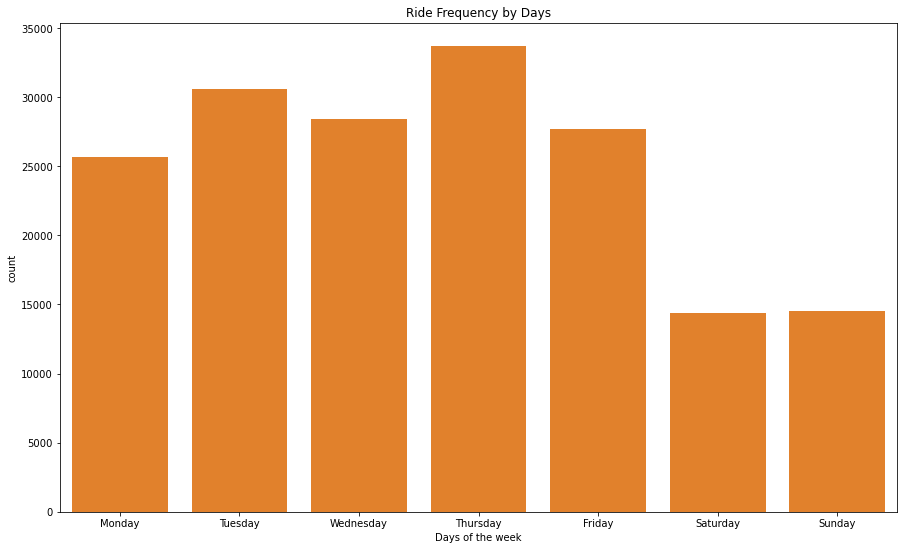

In [5]:
plt.figure(figsize = (15,9))
sb.countplot(data = bike, x = 'start_day', color = sb.color_palette()[1])
plt.xlabel('Days of the week')
plt.title('Ride Frequency by Days');

## DIstribution of Rides by Hours

On an hourly bases, most rides were taken around 8th and 9th hours (for morning) and 17th to 18th hours (for evening). This distribution may be linked to the morning and evening rush hours.

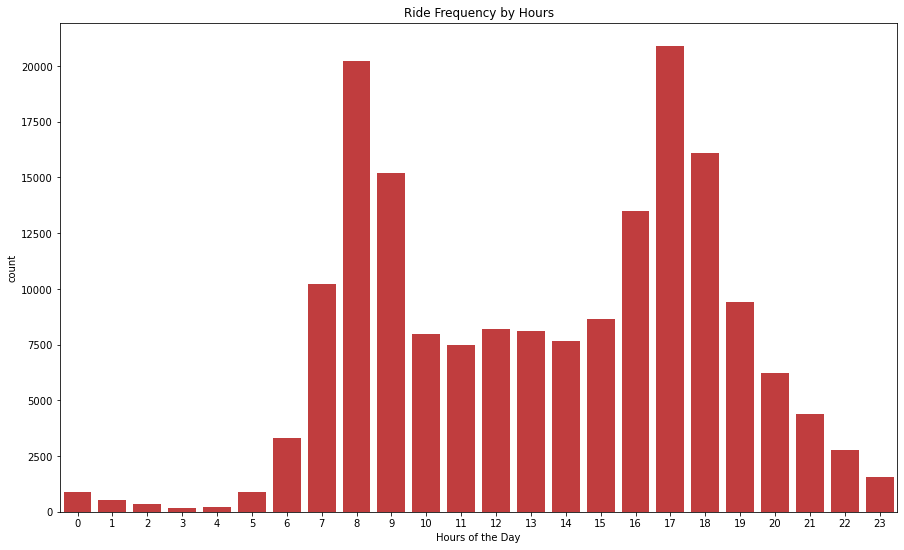

In [6]:
plt.figure(figsize = (15,9))
sb.countplot(data = bike, x = 'start_hr', color = sb.color_palette()[3])
plt.xlabel('Hours of the Day')
plt.title('Ride Frequency by Hours');

## Distribution of Riders by Age

71% of the riders are millenials (18-37)

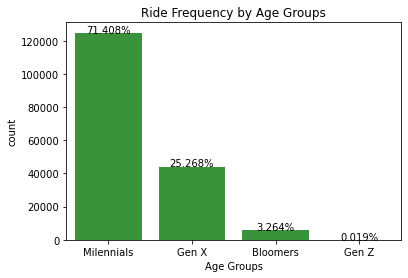

In [7]:
ax = sb.countplot(data = bike, x = 'age_groups',  color= sb.color_palette()[2], order = bike.age_groups.value_counts().index)

total = len(bike)
for p in ax.patches:
    percentage = '{:.3f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()/2
    y = p.get_height()+0.5
    ax.annotate(percentage, (x, y),ha='center')
plt.xlabel('Age Groups')
plt.title('Ride Frequency by Age Groups')
plt.show()

## Distribution of Riders by Gender
majority of the riders are male


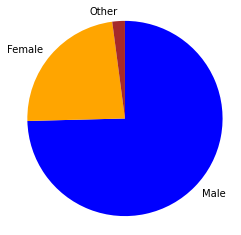

In [8]:
sorted_counts = bike['member_gender'].value_counts()

# plotting the pie chart 
plt.pie(sorted_counts, labels=sorted_counts.index, 
        colors=['blue', 'orange', 'brown'], startangle=90, counterclock=False)
plt.axis('square');

## Distribution of Riders by User type
large chunk of users are subscribers

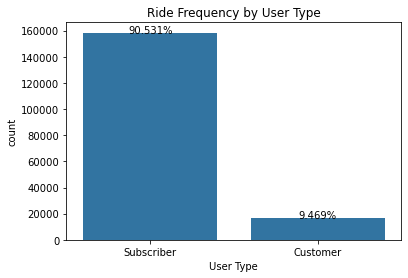

In [9]:
ax = sb.countplot(data = bike, x = 'user_type',  color=sb.color_palette()[0], order=bike.user_type.value_counts().index)

total = len(bike)
for p in ax.patches:
    percentage = '{:.3f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()/2
    y = p.get_height()+.05
    ax.annotate(percentage, (x, y),ha='center')
plt.xlabel('User Type')
plt.title('Ride Frequency by User Type');

> So far, data shows that a large majority of riders are Male subscribers within the ages of 18-37 and mostly rides on Thursdays and Tuesdays around 8th-9th hour of the morning and 17th to 18th hour of the evening.

> Computing for the user demograph that averages out the longest ride.

## Average Ride Duration by Age group

This shows that on the average, Gen Z Trips are longest of all the other Age groups

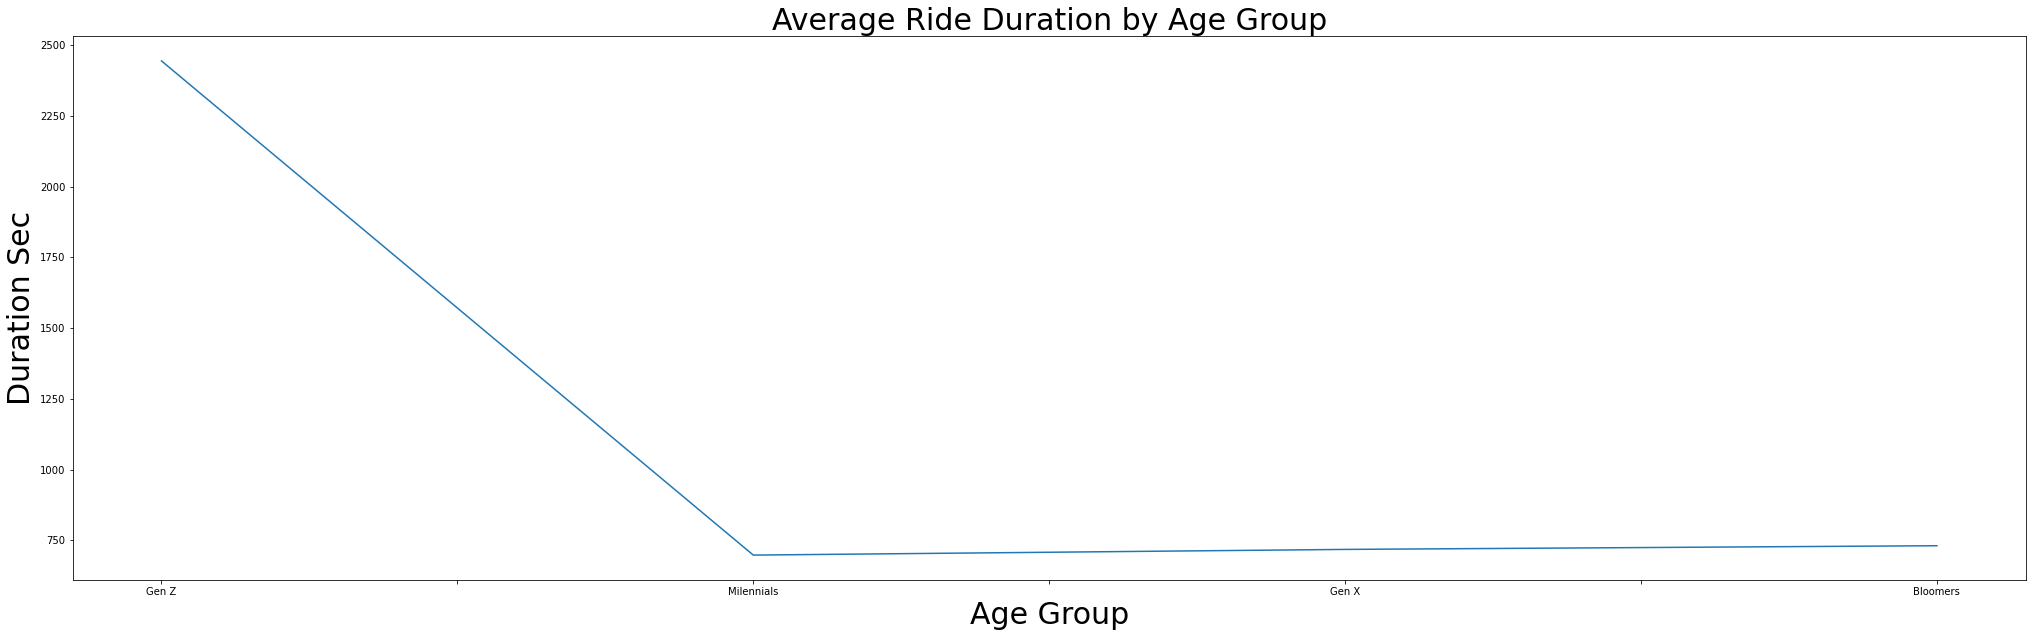

In [10]:
# duration_sec vs age_groups
# checking the average ride duration per age groups
# using groupby to arrange duration_sec and age groups
bike_AD = bike.groupby('age_groups')['duration_sec'].mean()

# defining a function to plot the relationship
def plot2 (bike, xlabel, ylabel, title):
    bike.plot(kind = 'line', figsize=(35,10))
    plt.xlabel("{}".format(xlabel), fontsize = 30)
    plt.ylabel("{}".format(ylabel), fontsize = 30)
    plt.title(label = title, fontsize = 30)
    plt.legend;
    plt.show()
    
# calling the function
plot2(bike_AD, 'Age Group', 'Duration Sec', 'Average Ride Duration by Age Group')

## Average Trip Duration Across Week days and Genders

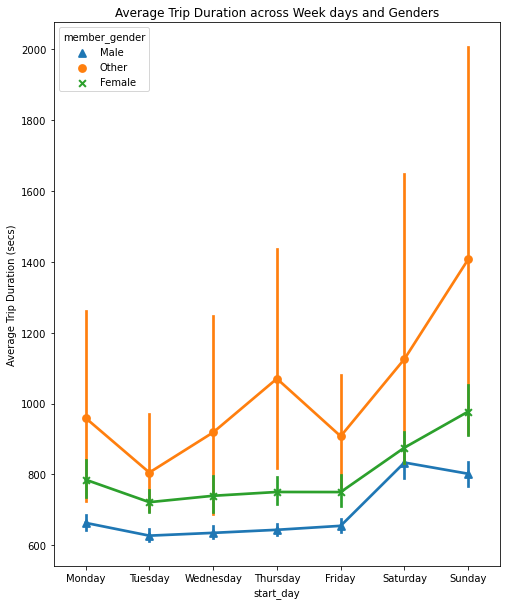

In [11]:
fig = plt.figure(figsize = [8, 10])
ax = sb.pointplot(data = bike, x = 'start_day', y = 'duration_sec', hue = 'member_gender', 
             linestyles = '-', markers = ['^', 'o', 'x',])
plt.title('Average Trip Duration across Week days and Genders')
plt.ylabel('Average Trip Duration (secs)')
ax.set_yticklabels([],minor = True)
plt.show();

These shows that the dmograph that averages out the longest ride duration is Other gender in the Gen Z age group and weekends happens to be their busiest days.

In [12]:
!jupyter nbconvert Part_II_slide_deck_template.ipynb --to slides --post serve --no-input --no-prompt

^C
